In [1]:
import sqlite3
import pandas as pd
import numpy as np
import rubin_sim.maf_proto as maf
%matplotlib inline


In [2]:
def count_ddf(note):
    is_ddf = ["DD" in n for n in note]
    return np.sum(is_ddf)

In [3]:
filename = "ddf_ocean_ocean1_v4.3.4_10yrs.db"
run_name = filename.replace(".db", "")
con= sqlite3.connect(filename)
df = pd.read_sql("select * from observations;", con)
con.close
visits_array = df.to_records()

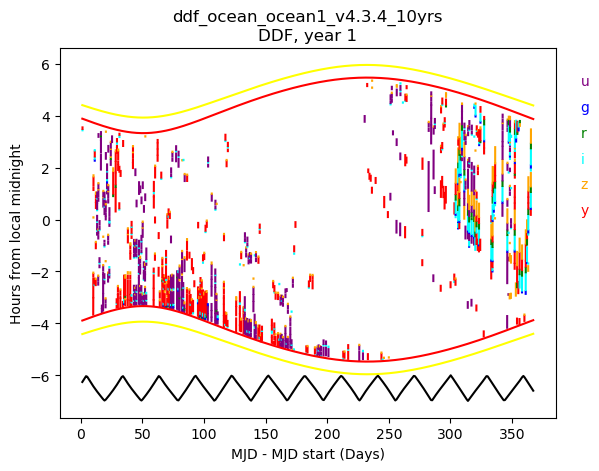

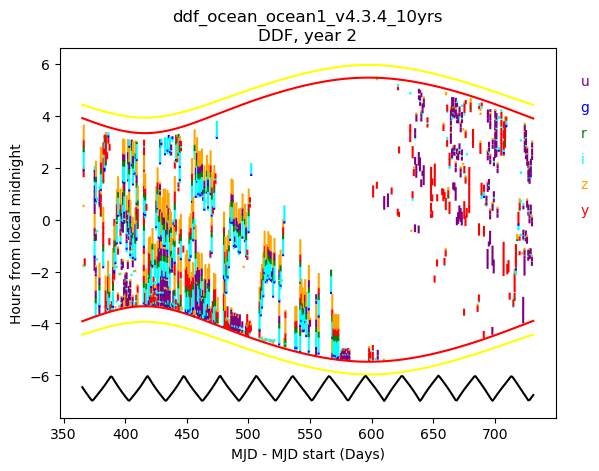

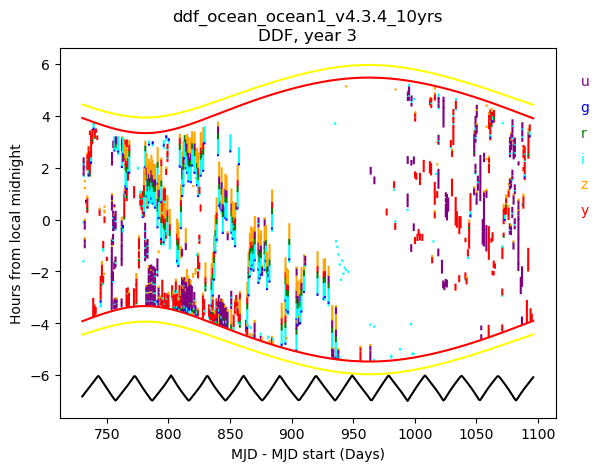

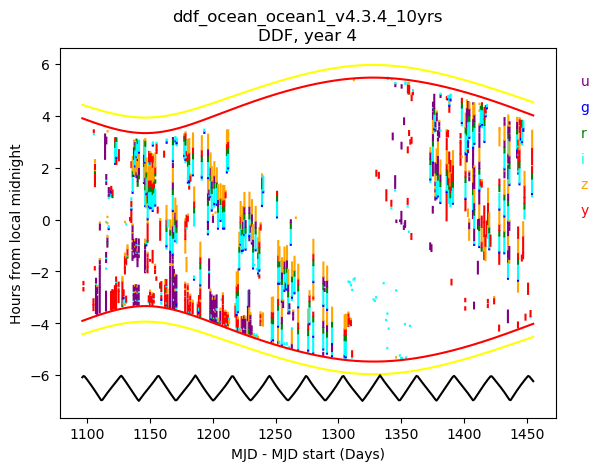

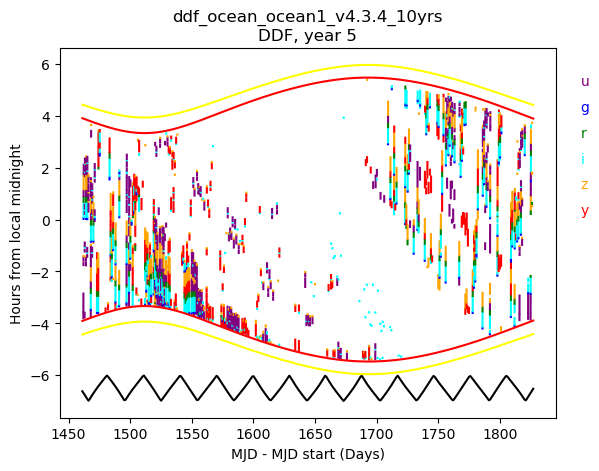

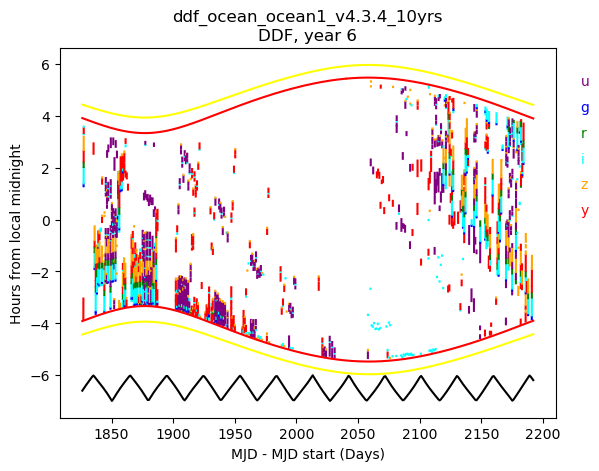

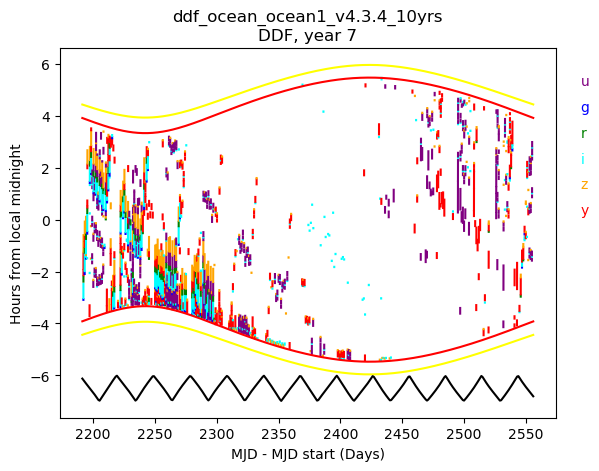

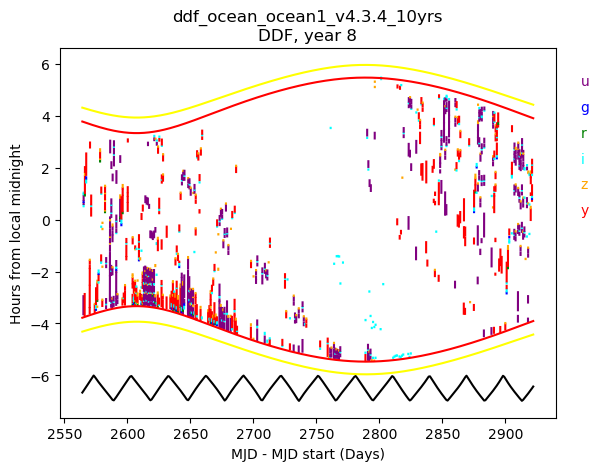

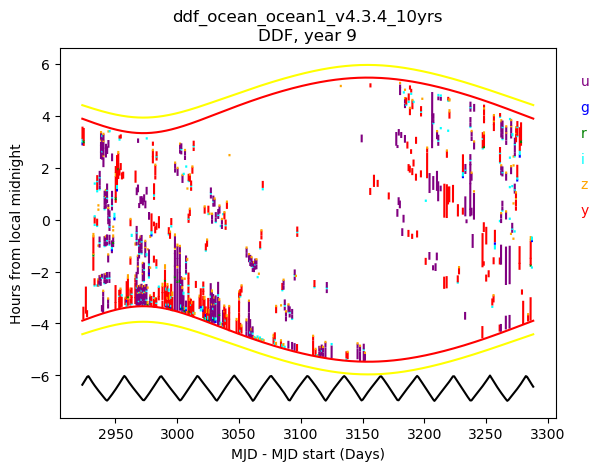

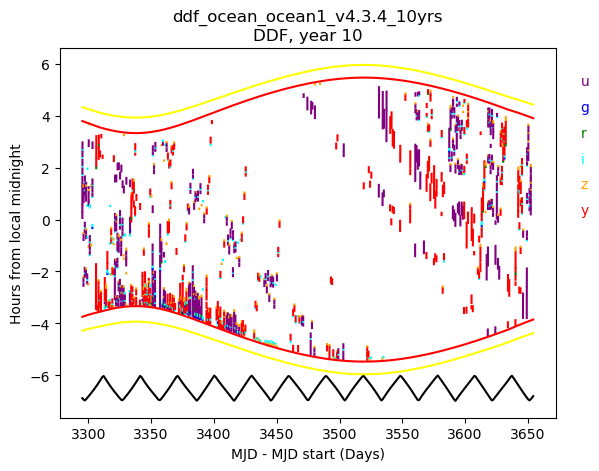

In [4]:
for year in np.arange(1,11):
    info = {"run_name": run_name}
    is_dd = np.array(["DD" in note for note in visits_array["scheduler_note"]])
    
    info["observations_subset"] = "DDF, year %i" % year
    n1 = 365.25*(year -1)
    n2 = 365.25*year
    
    indx = np.where((is_dd) & (n1 < visits_array["night"]) & (visits_array["night"]< n2))
    
    hr = maf.PlotHourglass(info=info)
    fig = hr(visits_array[indx])

In [5]:

df["year"] = np.floor(df["night"]/365)
df.groupby("year")["scheduler_note"].apply(count_ddf)
dd_names = [name for name in np.unique(df["target_name"]) if "DD" in name]

for dd in dd_names:
    indx = np.where(visits_array["target_name"] == dd)[0]
    labels, counts = np.unique(visits_array["filter"][indx],return_counts=True)

    print(dd, "Total visits=", np.size(indx))
    for l,c in zip(labels, counts):
        print(l, c)

DD:COSMOS Total visits= 63401
g 1646
i 16842
r 5569
u 12400
y 11812
z 15132
DD:ECDFS Total visits= 45232
g 1060
i 7007
r 2548
u 13681
y 14351
z 6585
DD:EDFS_a Total visits= 21902
g 200
i 3366
r 891
u 6936
y 7312
z 3197
DD:EDFS_b Total visits= 21817
g 200
i 3338
r 891
u 6914
y 7274
z 3200
DD:ELAISS1 Total visits= 42728
g 1009
i 6556
r 2360
u 13300
y 13490
z 6013
DD:XMM_LSS Total visits= 40181
g 887
i 6215
r 2205
u 12994
y 12484
z 5396


In [6]:
filename = "ddf_ocean_ocean2_v4.3.4_10yrs.db"
run_name = filename.replace(".db", "")
con= sqlite3.connect(filename)
df = pd.read_sql("select * from observations;", con)
con.close
visits_array = df.to_records()

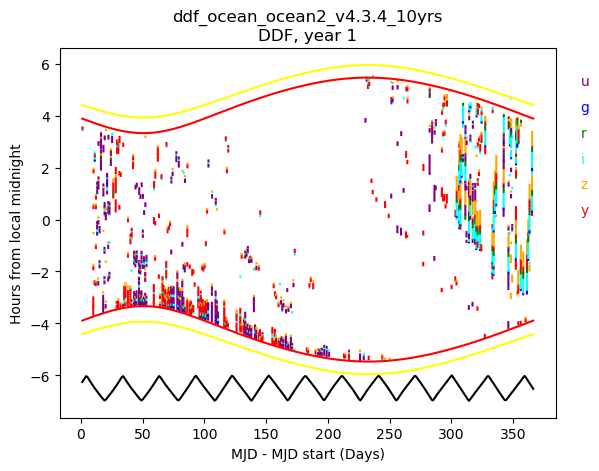

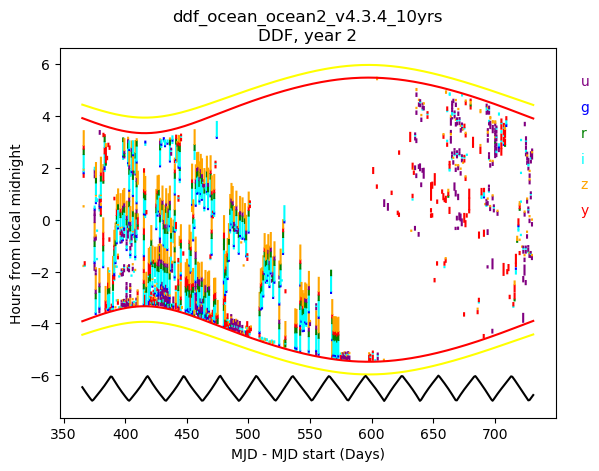

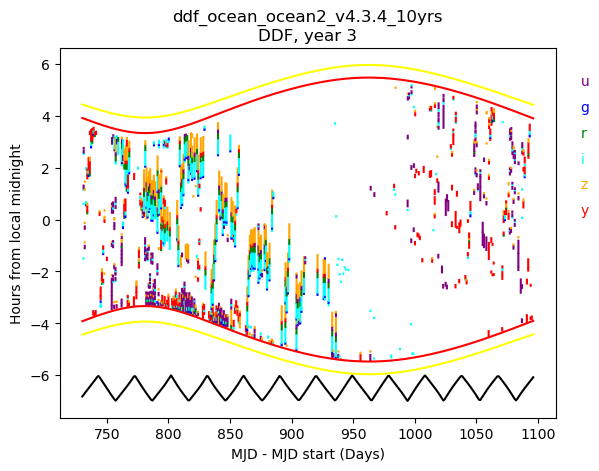

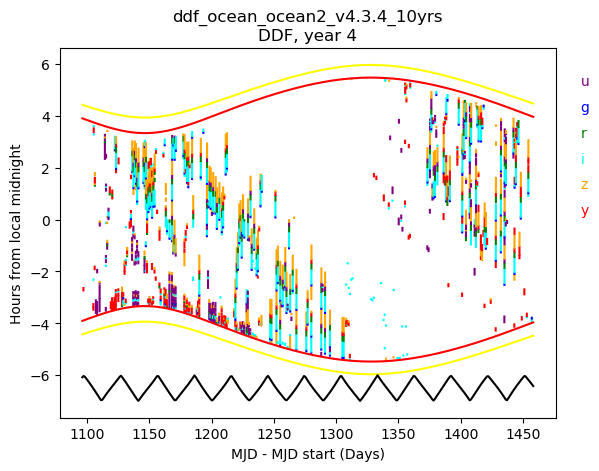

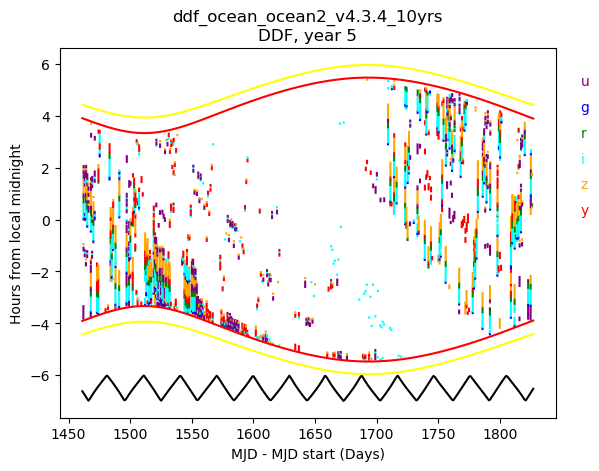

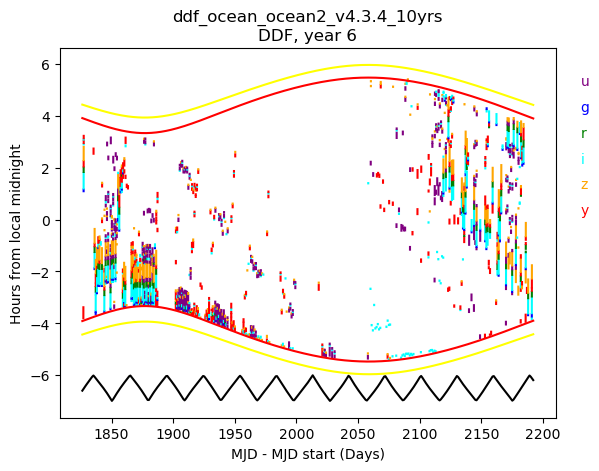

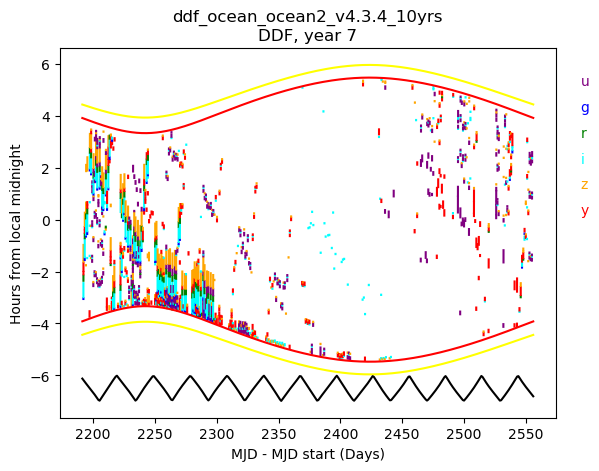

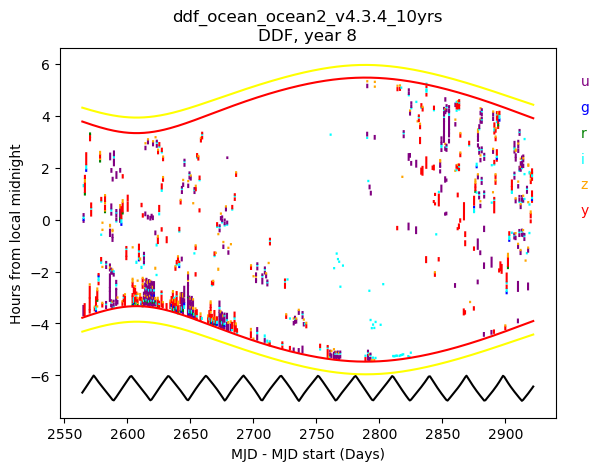

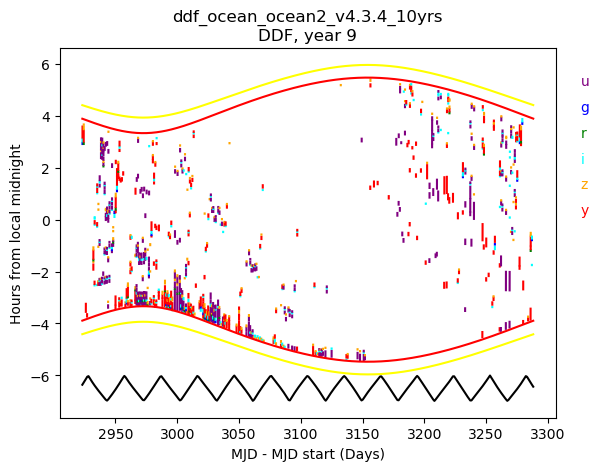

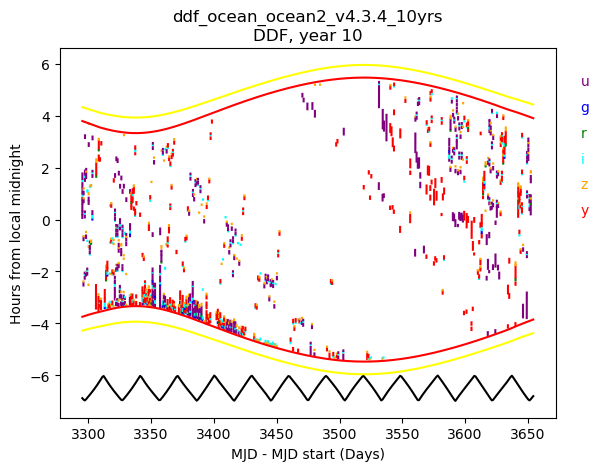

In [7]:
for year in np.arange(1,11):
    info = {"run_name": run_name}
    is_dd = np.array(["DD" in note for note in visits_array["scheduler_note"]])
    
    info["observations_subset"] = "DDF, year %i" % year
    n1 = 365.25*(year -1)
    n2 = 365.25*year
    
    indx = np.where((is_dd) & (n1 < visits_array["night"]) & (visits_array["night"]< n2))
    
    hr = maf.PlotHourglass(info=info)
    fig = hr(visits_array[indx])

In [8]:
df["year"] = np.floor(df["night"]/365)
df.groupby("year")["scheduler_note"].apply(count_ddf)
dd_names = [name for name in np.unique(df["target_name"]) if "DD" in name]

for dd in dd_names:
    indx = np.where(visits_array["target_name"] == dd)[0]
    labels, counts = np.unique(visits_array["filter"][indx],return_counts=True)

    print(dd, "Total visits=", np.size(indx))
    for l,c in zip(labels, counts):
        print(l, c)


DD:COSMOS Total visits= 51523
g 1643
i 16887
r 5563
u 6295
y 5890
z 15245
DD:ECDFS Total visits= 31381
g 1069
i 7031
r 2533
u 6926
y 7203
z 6619
DD:EDFS_a Total visits= 14890
g 202
i 3395
r 896
u 3506
y 3650
z 3241
DD:EDFS_b Total visits= 14842
g 202
i 3374
r 891
u 3493
y 3650
z 3232
DD:ELAISS1 Total visits= 29519
g 1016
i 6539
r 2380
u 6703
y 6781
z 6100
DD:XMM_LSS Total visits= 27961
g 923
i 6339
r 2215
u 6554
y 6298
z 5632
